In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay, auc, roc_auc_score

In [2]:
df1 = pd.read_csv('idotdo_des_rfe.csv')
df1

,NumValenceElectrons,MaxPartialCharge,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_CHGHI,BalabanJ,BertzCT,Chi2n,Chi2v,Chi3n,...,MolMR,fr_NH0,fr_Nhpyrrole,fr_amide,fr_amidine,fr_aniline,fr_bicyclic,fr_ether,fr_furan,fr_pyridine
0,96,0.265850,1.850000,2.700000,2.299512,2.196267,959.735009,4.583717,4.583717,3.422924,...,70.7305,2,0,0,0,0,4,0,0,0
1,118,0.237258,1.826087,2.565217,2.398429,2.078932,886.505066,7.114813,7.835053,5.264118,...,91.2060,0,0,0,0,0,5,0,1,0
2,96,0.265850,1.850000,2.700000,2.297007,2.213612,959.735009,4.583717,5.020153,3.424103,...,75.7825,2,0,0,0,0,4,0,0,0
3,114,0.141781,1.250000,2.000000,2.141598,1.978942,1147.880205,5.917334,5.917334,4.531742,...,98.2065,1,1,0,0,0,6,0,0,0
4,76,0.315479,2.266667,2.933333,2.197032,2.903274,556.293908,2.882802,2.882802,1.992077,...,50.0202,2,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,102,0.067149,2.210526,3.052632,2.226436,1.771904,568.816461,5.246409,6.100746,3.983299,...,80.2482,1,1,0,0,1,1,0,0,0
753,90,0.068191,2.411765,3.235294,2.137116,1.805917,516.200028,4.458764,5.374440,3.224730,...,73.3081,1,1,0,0,1,1,0,0,0
754,118,0.237313,1.913043,2.652174,2.394416,2.042118,854.494834,7.033101,7.033101,5.213113,...,84.6918,0,0,0,0,0,5,0,1,0
755,94,0.202775,2.277778,2.833333,2.149948,2.267862,600.393973,3.200566,3.607766,2.020549,...,62.0666,3,0,0,1,2,0,0,0,0


In [3]:
df2 = pd.read_csv('multitarget.csv')
df2

,ido_tdo
0,AA
1,II
2,AI
3,II
4,II
...,...
752,II
753,II
754,IA
755,AI


In [4]:
x, y = df1, df2['ido_tdo']
y

0      AA
1      II
2      AI
3      II
4      II
       ..
752    II
753    II
754    IA
755    AI
756    AA
Name: ido_tdo, Length: 757, dtype: object

In [5]:
encoder = LabelEncoder()

In [6]:
y_label = encoder.fit_transform(y)

In [7]:
y_label

array([0, 3, 1, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0, 1,
       3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 3,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0,
       3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0, 3,
       3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 0, 1, 3, 1, 0, 0, 3, 3, 0, 0,
       2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 3, 0,

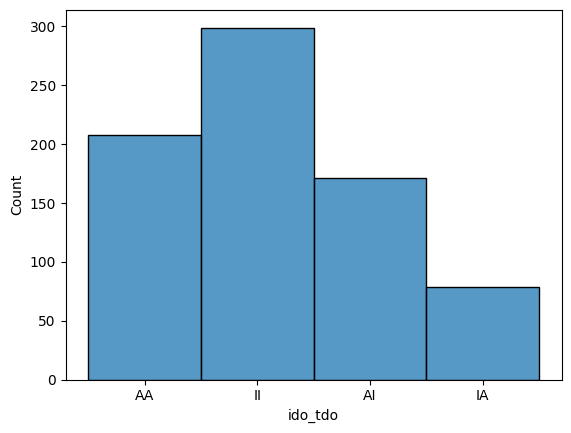

In [8]:
sns.histplot(y);

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
x_scaled = StandardScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_label, test_size=0.2, random_state=164641)

In [12]:
model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
model.score(x_train, y_train)

0.7603305785123967

In [14]:
model.score(x_test, y_test)

0.7368421052631579

In [15]:
yp_train = model.predict(x_train)

In [16]:
yp_test = model.predict(x_test)

In [17]:
confusion_matrix(y_train, yp_train)

array([[138,   5,   6,  14],
       [ 19, 105,   1,  16],
       [ 17,   0,  23,  26],
       [ 19,  12,  10, 194]])

In [18]:
confusion_matrix(y_test, yp_test)

array([[35,  3,  4,  3],
       [10, 19,  0,  1],
       [ 4,  0,  3,  6],
       [ 5,  3,  1, 55]])

In [19]:
print(classification_report(y_train, yp_train))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       163
           1       0.86      0.74      0.80       141
           2       0.57      0.35      0.43        66
           3       0.78      0.83      0.80       235

    accuracy                           0.76       605
   macro avg       0.73      0.69      0.70       605
weighted avg       0.76      0.76      0.75       605



In [20]:
print(classification_report(y_test, yp_test))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71        45
           1       0.76      0.63      0.69        30
           2       0.38      0.23      0.29        13
           3       0.85      0.86      0.85        64

    accuracy                           0.74       152
   macro avg       0.66      0.63      0.63       152
weighted avg       0.73      0.74      0.73       152



In [21]:
y_test

array([1, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 1, 1, 2, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 1, 1, 2, 3, 0, 3, 2, 3, 3, 3, 0, 3, 0, 1, 0, 1, 2,
       0, 1, 3, 0, 0, 0, 1, 3, 3, 3, 0, 0, 3, 3, 0, 1, 0, 3, 3, 0, 0, 3,
       1, 3, 0, 1, 3, 0, 3, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 1, 3, 2, 0,
       3, 1, 0, 1, 3, 1, 1, 3, 1, 3, 0, 1, 0, 3, 0, 3, 3, 3, 2, 3, 3, 1,
       0, 1, 3, 3, 3, 1, 3, 1, 0, 0, 0, 0, 2, 3, 1, 1, 3, 3, 3, 3])

In [22]:
np.mean(cross_val_score(model, x_train, y_train, cv=5))

0.687603305785124

In [23]:
np.mean(cross_val_score(model, x_test, y_test, cv=5))

0.6580645161290322

In [24]:
roc_auc_score(y_train, model.predict_proba(x_train), multi_class='ovr')

0.9198677507931209

In [25]:
roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr', average='macro')

0.8751590977346707

In [26]:
roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr', average=None)

array([0.87642783, 0.9181694 , 0.79579413, 0.91024503])

In [27]:
y_pred_test = model.decision_function(x_test)

<Axes: xlabel='Feature'>

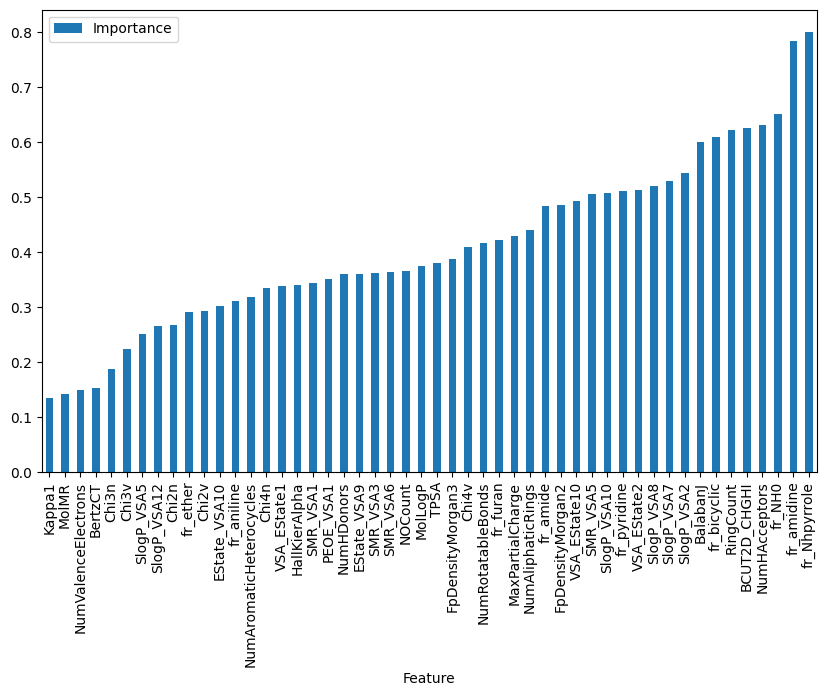

In [28]:
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))

Text(0.5, 1.0, 'Feature importance for class AA')

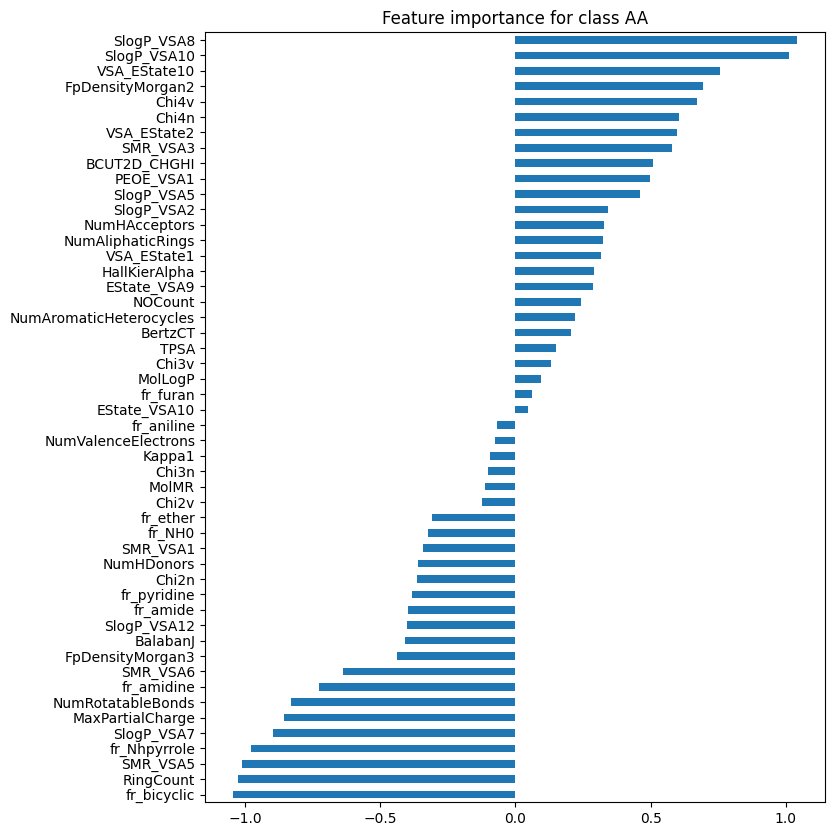

In [29]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[0], index = x.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for class AA")

Text(0.5, 1.0, 'Feature importance for AI')

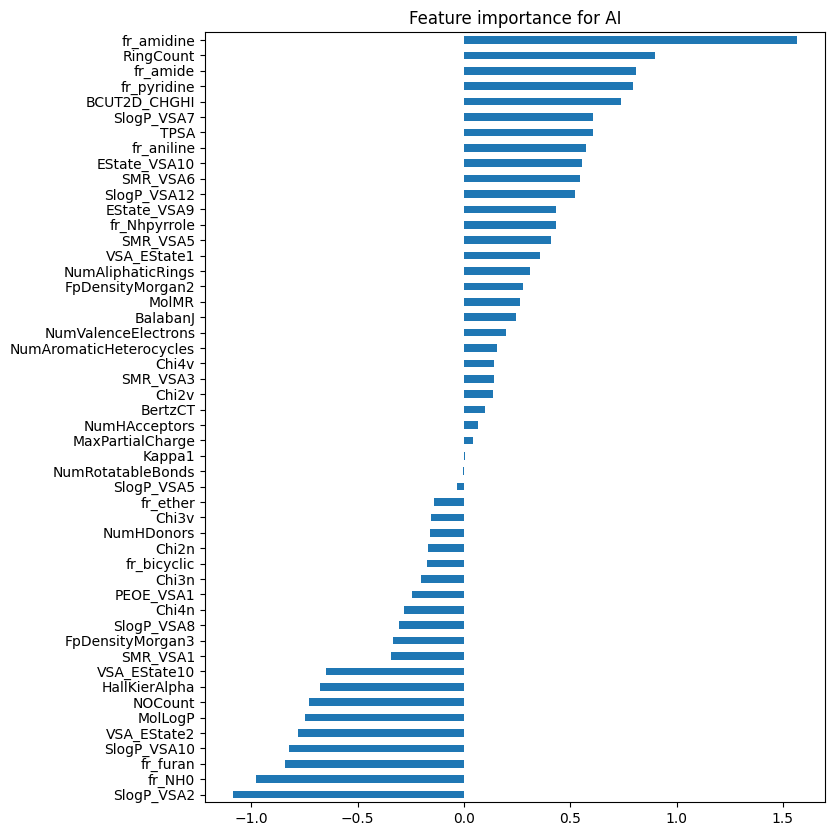

In [30]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[1], index = x.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for AI")

Text(0.5, 1.0, 'Feature importance for IA')

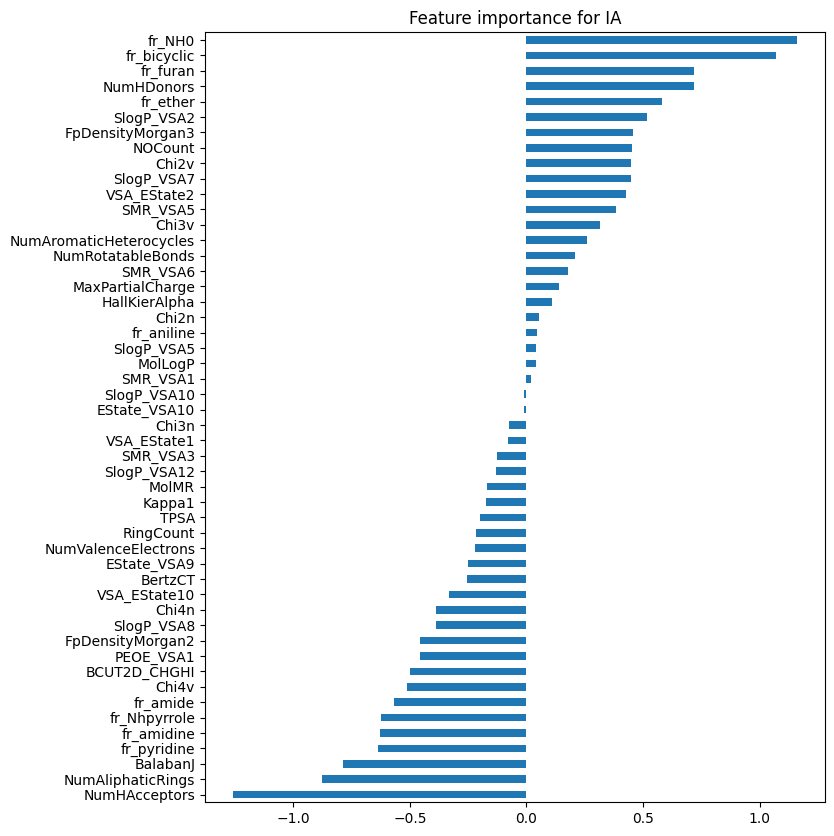

In [31]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[2], index = x.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for IA")

Text(0.5, 1.0, 'Feature importance for II')

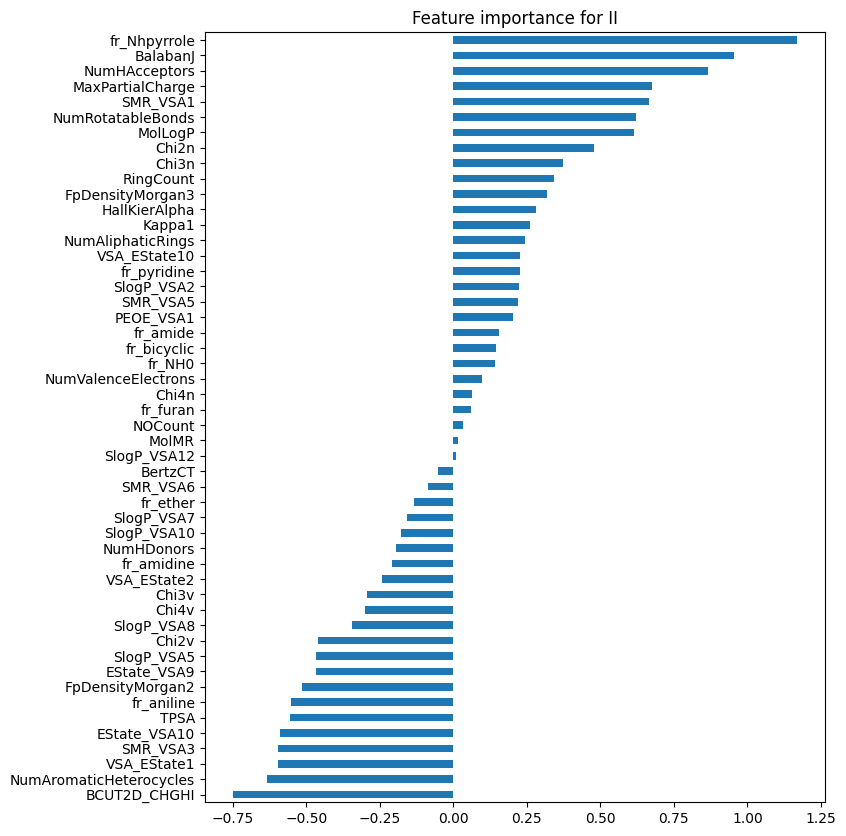

In [32]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.coef_[3], index = x.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for II")